In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_56217_Z')

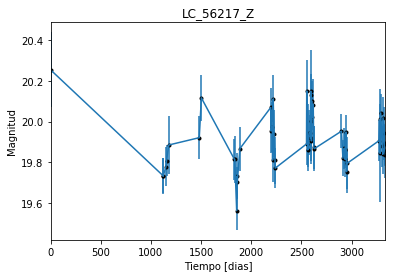

In [2]:
data = np.genfromtxt('LC_56217_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_56217_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

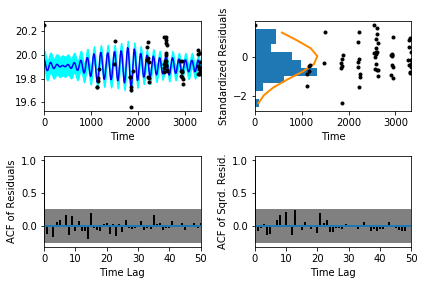

In [5]:
sample.assess_fit()

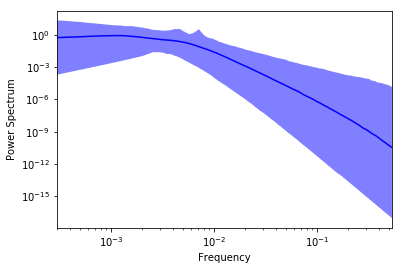

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_56217_Z')

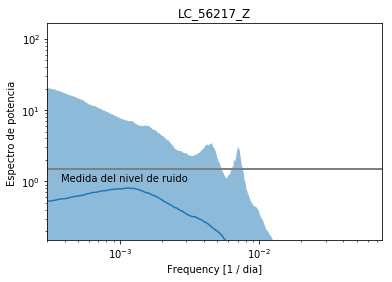

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_56217_Z')

Text(0.5,1,'Prediccion , valor esperado LC_56217_Z')

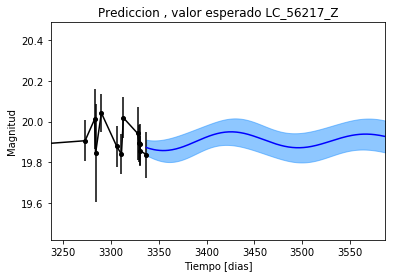

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_56217_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_56217_Z')

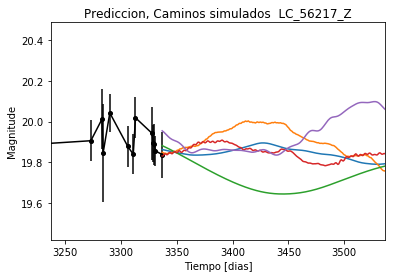

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_56217_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_56217_Z')

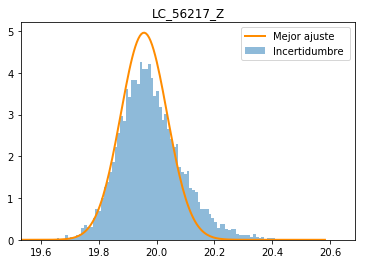

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_56217_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_56217_Z')

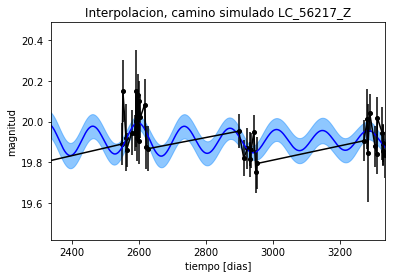

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56217_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_56217_Z')

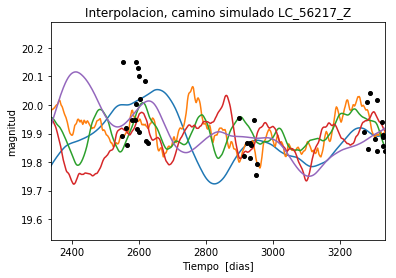

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56217_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 611.215823777
Median: 0.0055774914164
Standard deviation: 0.16653918421
68% credibility interval: [ 0.00061968  0.10389152]
95% credibility interval: [  3.26701253e-04   6.48470973e-01]
99% credibility interval: [  3.06010193e-04   9.33362512e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 560.929378409
Median: 0.00257484139345
Standard deviation: 0.098282104165
68% credibility interval: [ 0.00051748  0.0350799 ]
95% credibility interval: [  3.21043493e-04   3.21594904e-01]
99% credibility interval: [  3.06010193e-04   6.68992752e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 517.123968336
Median: 0.0103221511673
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 665.733205027
Median: 75.0172030071
Standard deviation: 1.90115888868
68% credibility interval: [ 73.07269827  76.5383003 ]
95% credibility interval: [ 70.36832462  78.21388507]
99% credibility interval: [ 68.51310642  78.88462085]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 498.815199536
Median: 0.480052185099
Standard deviation: 2.14738329357
68% credibility interval: [ 0.04728668  3.4860345 ]
95% credibility interval: [ 0.01268796  7.34404494]
99% credibility interval: [  9.11255790e-03   1.05383409e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 694.294953841
Median: 0.261623069169
Standard deviation: 9.66628289911
68% credibility interval: [ 0.00912367  8.09662358]
95% credibility interval: [  1.6

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20024.7304352
Median: 4.77459167207e-16
Standard deviation: 2.29109947765e+145
68% credibility interval: [  6.08450270e-52   8.58031075e+43]
95% credibility interval: [  1.12638579e-096   1.15209697e+138]
99% credibility interval: [  2.32057159e-130   2.34138251e+140]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3647.86711509
Median: 19.8942754821
Standard deviation: 0.0449958079338
68% credibility interval: [ 19.86236834  19.92928349]
95% credibility interval: [ 19.81701612  19.99641205]
99% credibility interval: [ 19.76119746  20.07704291]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 293.234761865
Median: 0.011128961396
Standard deviation: 0.250577759132
68% credibility interval: [ 0.          0.35651952]
95% credibility interval: [ 0.          0.92032793]
99% credibility interval: [ 0.          1.02705272]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 293.234761865
Median: 0.011128961396
Standard deviation: 0.250577759132
68% credibility interval: [ 0.          0.35651952]
95% credibility interval: [ 0.          0.92032793]
99% credibility interval: [ 0.          1.02705272]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2146.25020253
Median: 0.0
Standard deviation: 0.00915596969364
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 665.733205027
Median: 75.0172030071
Standard deviation: 1.90115888868
68% credibility interval: [ 73.07269827  76.5383003 ]
95% credibility interval: [ 70.36832462  78.21388507]
99% credibility interval: [ 68.51310642  78.88462085]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2669.82670269
Median: 0.00994316281753
Standard deviation: 0.0161424757032
68% credibility interval: [ 0.00532925  0.02024574]
95% credibility interval: [ 0.00264991  0.05032595]
99% credibility interval: [ 0.00163575  0.09142938]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1438.71994169
Median: 0.862759920178
Standard deviation: 0.132194597976
68% credibility interval: [ 0.74606969  1.00721466]
95% credibility interval: [ 0.64010526  1.15574985]
99% credibility interval: [ 0.5942215   1.27885713]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1508.48776613
Median: 3.38396149474e-05
Standard deviation: 0.160567531271
68% credibility interval: [  2.74657515e-48   5.77426175e-03]
95% credibility interval: [  3.48521906e-142   1.37723284e-001]
99% credibility interval: [  1.39276473e-144   6.99156873e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 611.215823777
Median: (-0.0350444121184-1.17054056726j)
Standard deviation: 1.89044030254
68% credibility interval: [-0.6527697+0.j         -0.0038936-0.02729842j]
95% credibility interval: [ -4.07446329e+00-2.83977611j  -2.05272451e-03-0.0629624j ]
99% credibility interval: [ -5.86448962e+00+0.j          -1.92271875e-03-0.02728037j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 560.929378409
Median: (-0.0161782056117+0.0881030522826j)
Standard deviation: 1.69119942884
68% credibility interval: [-0.22041350+1.21860969j -0.00325142+6.60539839j]
95% credibility interval: [ -2.02064037e+00+1.72615086j  -2.01717576e-03+0.j        ]
99% credibility interval: [ -4.20340543e+00+4.02134998j  -1.92271875e-03+0.02728037j]
Post